In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
import os
import glob
import seaborn as sns; sns.set()

# fe_dir = "C:\\Users\\ikang7\\Dropbox (GaTech)\\ML\\data\\sensor_fusion\\feature extraction data\\"
# raw_dir = "C:\\Users\\ikang7\\Dropbox (GaTech)\\ML\\data\\sensor_fusion\\Opensim Data\\"
raw_dir = "F:\\Dropbox (GaTech)\\ML\\data\\sensor_fusion\\Opensim Data\\"
norm_dir = "F:\\Dropbox (GaTech)\\ML\\data\\sensor_fusion\\norm_matrix\\"
window_size = 350
transition_point = 0.2

trial_pool = [1]
subject_pool = [11]
mode_pool = ["RA2"]
# mode_pool = ["RA2", "RA3", "RA4", "RA5", "RD2", "RD3", "RD4", "RD5","SA1", "SA2", "SA3", "SA4", "SD1", "SD2", "SD3", "SD4"]
leg_pool = ["R"]
# subject_pool = [6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27 ,28]

feature_data = pd.DataFrame()
mode_label = pd.DataFrame()
gait_phase = pd.DataFrame()

# Reading Data Files
for trial in trial_pool:
    for subject in subject_pool:
        for mode in mode_pool:
            for starting_leg in leg_pool:
                data_path = raw_dir+"AB"+str(subject)+"_"+str(mode)+"_S2_"+str(starting_leg)+"_T"+str(trial)+".csv"

                if os.path.exists(data_path) == 1:
                    for data_read_path in glob.glob(data_path):
                        data = pd.read_csv(data_read_path, header=0)
                        feature_data = pd.concat([feature_data, data.iloc[:, :-3]], axis=0, ignore_index=True)
                        mode_label = pd.concat([mode_label, data.iloc[:, -3]], axis=0, ignore_index=True)
                        gait_phase = pd.concat([gait_phase, data.iloc[:, -2]], axis=0, ignore_index=True)
                feature_data = feature_data.to_numpy()
                mode_label = mode_label.to_numpy()
                gait_phase = gait_phase.to_numpy()
                
                

# Reading Norm Matrix          
norm_matrix = []
for subject in [6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 27 ,28]:
    norm_path = norm_dir+"AB"+str(subject)+"_norm.csv"
    for data_read_path in glob.glob(norm_path):
        data = pd.read_csv(data_read_path, header=None)
        norm_matrix.append(data.values)

In [19]:
print(np.shape(norm_matrix))

            processing_data = (processing_data - norm_mat[:,0])/norm_mat[:,1]

(20, 14, 2)
[10.79171444 15.76074234]


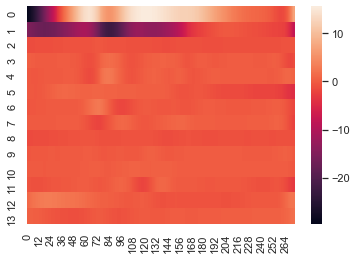

In [12]:
transition_mode_diff = np.where(np.diff(np.transpose(mode_label)) != 0)[1]
transition_idx_1 = np.arange(0, transition_mode_diff[0]+1)
transition_idx_2 = np.arange(transition_mode_diff[1]+1, len(mode_label))
# print(np.transpose(gait_phase))
ax = sns.heatmap(np.transpose(feature_data[transition_idx_1,:]))
ax = sns.heatmap(np.transpose(feature_data[transition_idx_2,:]))